In [2]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv('metdata_cleaned.csv')

df.head()

,objectID,isHighlight,accessionNumber,accessionYear,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,...,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags,objectWikidata_URL,isTimelineWork,GalleryNumber
0,1,False,1979.486.1,1979.0,False,NaN,NaN,[],"[{'constituentID': 164292, 'role': 'Maker', 'n...",The American Wing,...,NaN,NaN,NaN,2021-04-06T04:41:04.967Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/1,NaN,NaN,False,NaN
1,2,False,1980.264.5,1980.0,False,NaN,NaN,[],"[{'constituentID': 1079, 'role': 'Maker', 'nam...",The American Wing,...,NaN,NaN,NaN,2021-04-06T04:41:04.967Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/2,NaN,NaN,False,NaN
2,3,False,67.265.9,1967.0,False,NaN,NaN,[],NaN,The American Wing,...,NaN,NaN,NaN,2021-04-06T04:41:04.967Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/3,NaN,NaN,False,NaN
3,4,False,67.265.10,1967.0,False,NaN,NaN,[],NaN,The American Wing,...,NaN,NaN,NaN,2024-01-10T04:57:19.843Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/4,NaN,NaN,False,NaN
4,5,False,67.265.11,1967.0,False,NaN,NaN,[],NaN,The American Wing,...,NaN,NaN,NaN,2024-01-10T04:57:19.843Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/5,NaN,NaN,False,NaN


In [3]:
# Creating dummy variables for selected categorical variables
categorical_vars = ['department', 'objectName', 'culture']
df_processed = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

df_processed.head()

,objectID,isHighlight,accessionNumber,accessionYear,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,title,...,"culture_Chinese, for American market",culture_Dutch,"culture_Dutch, probably",culture_European,culture_French,"culture_French, possibly",culture_German,culture_Guatemalan,culture_Mexican,culture_Spanish
0,1,False,1979.486.1,1979.0,False,NaN,NaN,[],"[{'constituentID': 164292, 'role': 'Maker', 'n...",One-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,0,0,0
1,2,False,1980.264.5,1980.0,False,NaN,NaN,[],"[{'constituentID': 1079, 'role': 'Maker', 'nam...",Ten-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,0,0,0
2,3,False,67.265.9,1967.0,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0
3,4,False,67.265.10,1967.0,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0
4,5,False,67.265.11,1967.0,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns for standardization
numeric_columns = ['accessionYear', 'objectBeginDate', 'objectEndDate']
scaler = StandardScaler()
df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

df_processed.head()

,objectID,isHighlight,accessionNumber,accessionYear,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,title,...,"culture_Chinese, for American market",culture_Dutch,"culture_Dutch, probably",culture_European,culture_French,"culture_French, possibly",culture_German,culture_Guatemalan,culture_Mexican,culture_Spanish
0,1,False,1979.486.1,1.516240,False,NaN,NaN,[],"[{'constituentID': 164292, 'role': 'Maker', 'n...",One-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,0,0,0
1,2,False,1980.264.5,1.554907,False,NaN,NaN,[],"[{'constituentID': 1079, 'role': 'Maker', 'nam...",Ten-dollar Liberty Head Coin,...,0,0,0,0,0,0,0,0,0,0
2,3,False,67.265.9,1.052244,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0
3,4,False,67.265.10,1.052244,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0
4,5,False,67.265.11,1.052244,False,NaN,NaN,[],NaN,Two-and-a-Half Dollar Coin,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

# Placeholder for feature selection
# You'll need to adjust 'features' and 'target' to your specific case
features = df_processed.drop('accessionYear', axis=1)
target = df_processed['accessionYear']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 800
Testing set size: 200


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'metdata_cleaned.csv'
df = pd.read_csv(file_path)

# Creating dummy variables for 'department' and 'culture'
df = pd.get_dummies(df, columns=['department', 'culture'], drop_first=True)

# Prepare the target variable
y = df['isPublicDomain']

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Prepare features
X = df[numeric_columns]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f'Random Forest Model Performance:')
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC-AUC Score: {roc_auc}')


Random Forest Model Performance:
Accuracy: 0.92
Precision: 0.9290322580645162
Recall: 0.9664429530201343
F1 Score: 0.9473684210526316
ROC-AUC Score: 0.9416370575075668


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'metdata_cleaned.csv'
df = pd.read_csv(file_path)

# Creating dummy variables for 'department' and 'culture'
df = pd.get_dummies(df, columns=['department', 'culture'], drop_first=True)

# Prepare the target variable
y = df['isPublicDomain']

# Exclude the non-numeric 'accessionNumber' column and any other non-numeric columns
df_features = df.drop(['isPublicDomain', 'accessionNumber'], axis=1)

# Select only numeric columns for imputation to avoid the error
numeric_columns = df_features.select_dtypes(include=['int64', 'float64']).columns

# Apply imputation to numeric columns only
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(df_features[numeric_columns])

In [7]:
# Adjust numeric_columns to contain only the columns present in imputed_data
# Grab only the first 7 columns of numeric_columns
numeric_columns = df_features.select_dtypes(include=['int64', 'float64']).columns[:7]

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns)

# Update the df_features with imputed data
df_features[numeric_columns] = imputed_df


In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Continue with train-test split, model training, and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC-AUC Score: {roc_auc}')


Accuracy: 0.84
Precision: 0.8305084745762712
Recall: 0.9865771812080537
F1 Score: 0.901840490797546
ROC-AUC Score: 0.7911567311488353


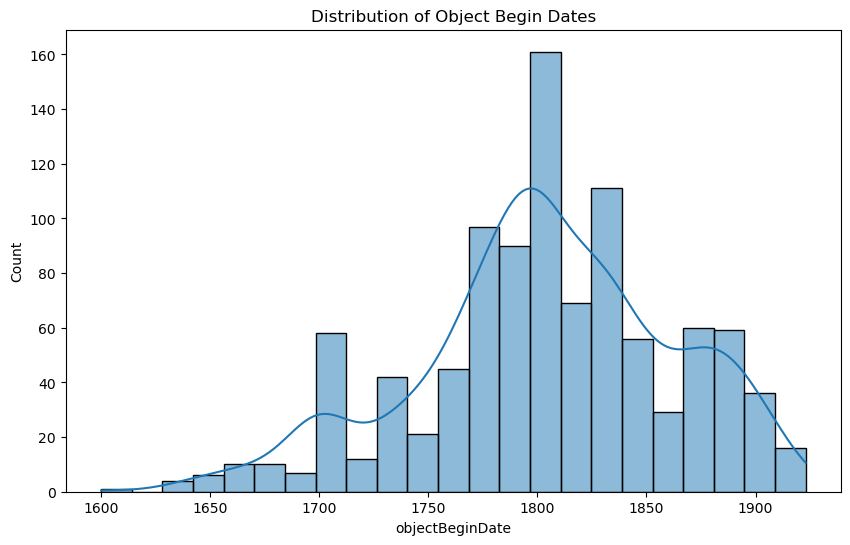

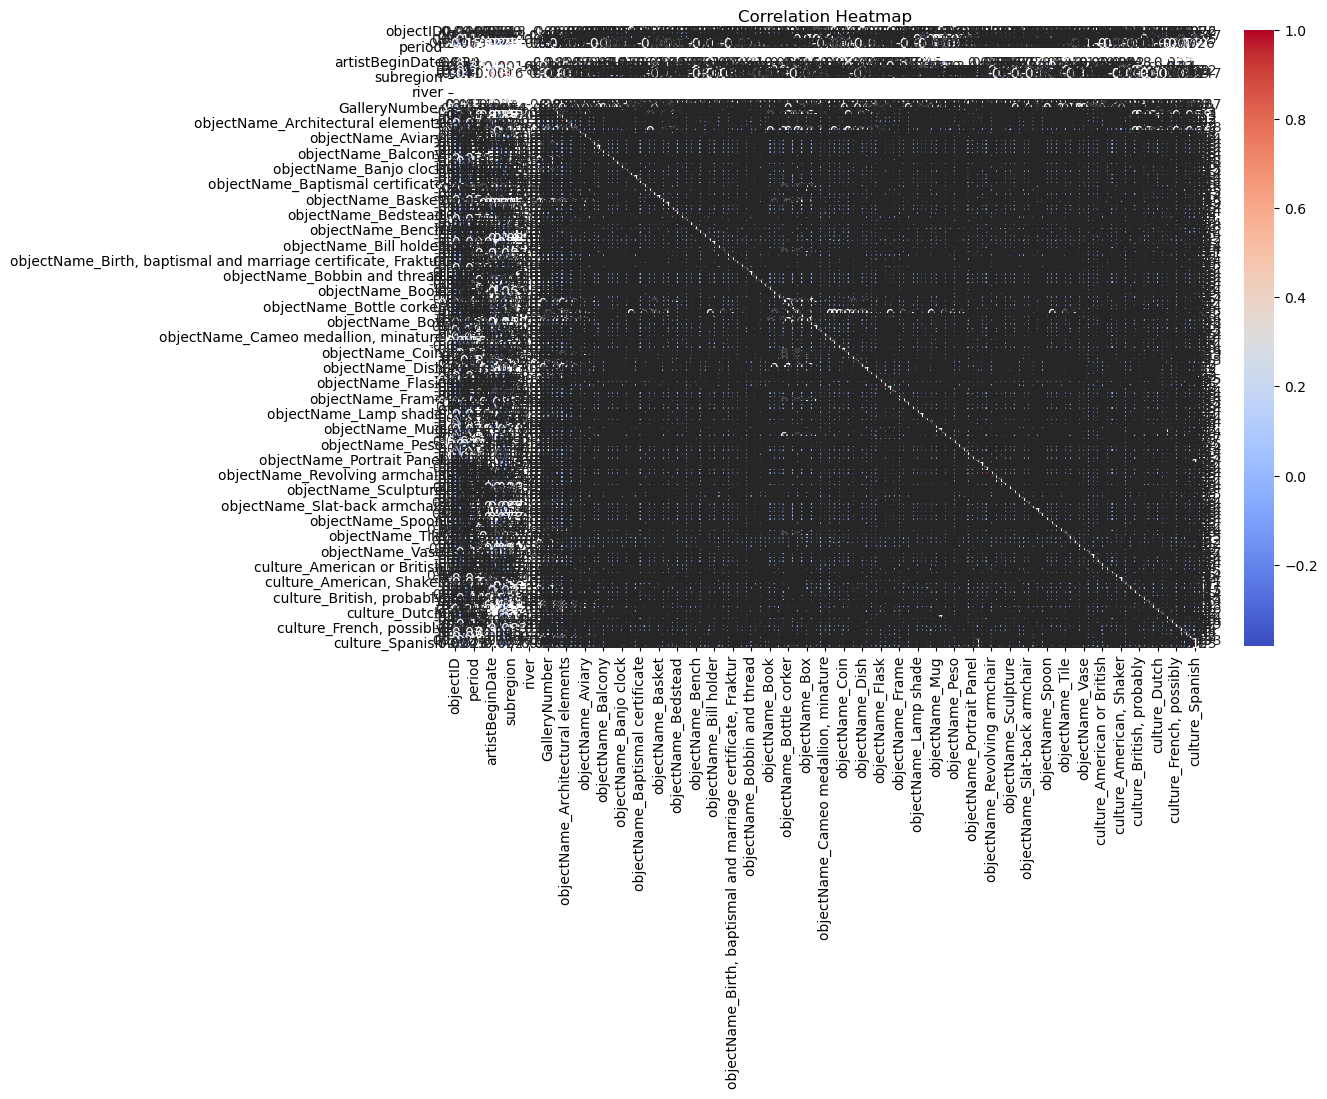

In [12]:
## Visualization 1: Distribution of Object Begin Dates
plt.figure(figsize=(10, 6))
sns.histplot(df['objectBeginDate'], kde=True)
plt.title('Distribution of Object Begin Dates')
plt.show()

In [ ]:
## Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()